In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
import plotly.express as px
import statistics

In [145]:
dt=pd.read_csv('Data/packets.csv')

In [146]:
print(dt.head(100))

             Source      Destination Protocol  Length        DT  source port  \
0    142.250.180.42  192.168.137.185      UDP      74  0.000000        443.0   
1    142.250.180.42  192.168.137.185      UDP      74  0.063438        443.0   
2    142.250.180.42  192.168.137.185      UDP      74  0.123586        443.0   
3   192.168.137.185   142.250.180.42      UDP      75  0.024475      62030.0   
4   192.168.137.185   142.250.180.42      UDP      77  0.000000      62030.0   
..              ...              ...      ...     ...       ...          ...   
95  192.168.137.185    216.58.208.67     QUIC     121  0.000279      53924.0   
96  192.168.137.185    216.58.208.67     QUIC      75  0.000178      53924.0   
97    216.58.208.67  192.168.137.185     QUIC      67  0.017287        443.0   
98    216.58.208.67  192.168.137.185     QUIC     146  0.000087        443.0   
99  192.168.137.185    216.58.208.67     QUIC      75  0.001661      53924.0   

      Absolute Time  Cumulative Bytes  

In [147]:
myip=' 192.168.137.185'
direction=[]


In [148]:
for i in dt['Destination']:
    if(i==myip):
        direction.append('in')
    else:
        direction.append('out')

In [149]:
dt.insert(0,'direction',direction)

In [150]:
print(dt.isnull().sum()) 

direction             0
Source                0
Destination           0
Protocol              0
Length                0
DT                    0
source port         145
Absolute Time         0
Cumulative Bytes      0
dest port           145
dtype: int64


In [151]:
dt['source port'].fillna(443,inplace=True)

In [152]:
inp=[]
out=[]
leng_mean=[]
leng_std=[]
leng_min=[]
leng_max=[]
sum_dt=[]
port=[]

In [153]:
start=0
end=100
inps=0
outs=0
cc=round(dt.shape[0]/100)
tempdf=[]
tempport=[]
tempdt=0
for i in range(cc):
    for k in range(start,end):
        if(dt['direction'][k]=='in'):
            inps=inps+1
        else:
            outs=outs+1
        tempdf.append(dt['Length'][k])
        tempdt=tempdt+dt['DT'][k]
        tempport.append(dt['source port'][k])

        
    leng_mean.append(statistics.mean(tempdf))
    leng_std.append(statistics.stdev(tempdf))
    leng_min.append(min(tempdf))
    leng_max.append(max(tempdf))
    sum_dt.append(tempdt)
    port.append(max(tempport,key=tempport.count))
    
    inp.append(inps)
    out.append(outs)
    start=start+100
    end=end+100
    inps=0
    outs=0
    tempdf=[]
    tempport=[]
    tempdt=0


In [154]:
df=pd.DataFrame()

In [155]:
df.insert(0,'inp',inp)
df.insert(1,'out',out)
df.insert(2,'leng_mean',leng_mean)
df.insert(3,'leng_std',leng_std)
df.insert(4,'leng_min',leng_min)
df.insert(5,'leng_max',leng_max)
df.insert(6,'sum_dt',sum_dt)
df.insert(7,'port',port)


In [156]:
df.to_csv('Data/packets_stat.csv')

<AxesSubplot:>

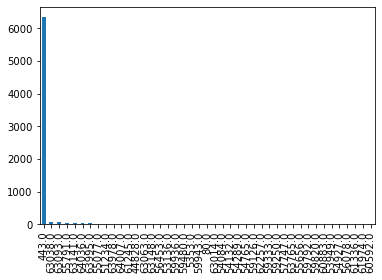

In [157]:
df['port'].value_counts().plot(kind='bar')

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle
from sklearn import preprocessing

In [143]:
X=df[[ 'inp', 'out', 'leng_mean', 'leng_std', 'leng_min', 'leng_max', 'sum_dt']].values
y=df['port'].values # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # 20% test data

classifier = KNeighborsClassifier(n_neighbors=50) # KNN object
classifier.fit(X_train, y_train) # Fit the KNN object to the training data

y_pred = classifier.predict(X_test) # Predict the test data

print(confusion_matrix(y_test, y_pred)) # Confusion Matrix
print(classification_report(y_test, y_pred)) # Classification Report

[[124   0   0   0   1   0]
 [  0  12   2   1  11  35]
 [  0   9  19   7   9  26]
 [  0   2   5  22   6  18]
 [  0   5   9  11  26  30]
 [  1  10   9  13  23  56]]
              precision    recall  f1-score   support

       443.0       0.99      0.99      0.99       125
     41983.0       0.32      0.20      0.24        61
     42113.0       0.43      0.27      0.33        70
     42203.0       0.41      0.42      0.41        53
     42565.0       0.34      0.32      0.33        81
     42806.0       0.34      0.50      0.40       112

    accuracy                           0.52       502
   macro avg       0.47      0.45      0.45       502
weighted avg       0.52      0.52      0.51       502



In [144]:
filename = 'KNN2.sav' 
pickle.dump(classifier , open(filename, 'wb')) # Save the model

In [159]:
df4=pd.read_csv('Data/packets_stat.csv')

print(df4.head())

   Unnamed: 0  inp  out  leng_mean    leng_std  leng_min  leng_max     sum_dt  \
0           0    0  100        466  566.704509        54      1466  17.816181   
1           1    0  100        415  563.245062        54      1466   2.250242   
2           2    0  100        475  596.364821        54      1466   6.478611   
3           3    0  100        397  461.134471        54      1466   0.324330   
4           4    0  100        462  525.759451        54      1466   0.252357   

    port  
0  443.0  
1  443.0  
2  443.0  
3  443.0  
4  443.0  


In [160]:
X2=df4[[ 'inp', 'out', 'leng_mean', 'leng_std', 'leng_min', 'leng_max', 'sum_dt']].values
loaded_model = pickle.load(open(filename, 'rb')) # Load the model 
Result = loaded_model.predict(X2) # Predict the test data

In [161]:
df4['Predict'] = Result # Add the predicted data to the dataframe

<AxesSubplot:ylabel='Predict'>

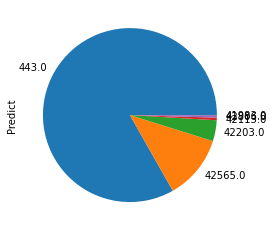

In [162]:
df4['Predict'].value_counts().plot(kind='pie') # Predicted

<AxesSubplot:ylabel='port'>

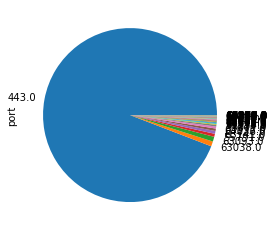

In [163]:
df4['port'].value_counts().plot(kind='pie') # Actual Port distribution